### Step 1: Install the required libraries

In [5]:
!pip install pymongo
!pip install textblob
!pip install WordCloud

### Step 2: Import the required libraries

In [1]:
import json
import pymongo
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import words

### Step 3: Load Data

In [2]:
client = pymongo.MongoClient('mongodb+srv://cluster0.cpy5tdw.mongodb.net', username='peiyu', password='1')
db = client["test"]
collection = db["tweets"]
dataset = list(collection.find())
first_data = ""

if len(dataset) > 0:
    first_data = dataset[0]
    print(first_data)
else:
    print("No data found in the dataset.")

C:\Users\ACER\anaconda3\lib\site-packages\cryptography\x509\base.py:521: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_der_x509_certificate(data)


{'_id': ObjectId('5c8eccb0caa187d17ca623f7'), 'text': "I can't wait for #BoardwalkEmpire", 'in_reply_to_status_id': None, 'retweet_count': None, 'contributors': None, 'created_at': 'Thu Sep 02 18:11:24 +0000 2010', 'geo': None, 'source': '<a href="http://www.tweetdeck.com" rel="nofollow">TweetDeck</a>', 'coordinates': None, 'in_reply_to_screen_name': None, 'truncated': False, 'entities': {'user_mentions': [], 'urls': [], 'hashtags': [{'text': 'BoardwalkEmpire', 'indices': [17, 33]}]}, 'retweeted': False, 'place': None, 'user': {'friends_count': 204, 'profile_sidebar_fill_color': 'DDEEF6', 'location': '', 'verified': False, 'follow_request_sent': None, 'favourites_count': 0, 'profile_sidebar_border_color': 'C0DEED', 'profile_image_url': 'http://a2.twimg.com/profile_images/936242594/missouri-crying1_normal.jpg', 'geo_enabled': False, 'created_at': 'Sat Aug 08 22:22:40 +0000 2009', 'description': '', 'time_zone': None, 'url': None, 'screen_name': 'seabass18', 'notifications': None, 'profi

### Step 4: Preprocess Data

In [3]:
processed_texts = []

for data in dataset:
    text = data['text']
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens back to form text
    processed_text = ' '.join(tokens)
    processed_texts.append(processed_text)
    
print("Before: ", first_data['text'])
print("After: ", processed_texts[0])

Before:  I can't wait for #BoardwalkEmpire
After:  cant wait boardwalkempire


### Step 5: Sentiment Analysis

In [4]:
sentiments = []

for text in processed_texts:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Print the sentiments
for sentiment in sentiments:
    if sentiment > 0:
        print("Positive")
    elif sentiment < 0:
        print("Negative")
    else:
        print("Neutral")

Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Positive
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Positive
Negative
Negative
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Positive
Positive
Neutral
Negative
Neutral
Neutral
Neutral
Neu

### Step 6: Analyze the sentiment scores

In [6]:
# Analyze the sentiment scores
positive_count = sum(sentiment > 0 for sentiment in sentiments)
negative_count = sum(sentiment < 0 for sentiment in sentiments)
neutral_count = len(sentiments) - positive_count - negative_count

# Print the sentiment analysis results
print("Positive Feedback Count:", positive_count)
print("Negative Feedback Count:", negative_count)
print("Neutral Feedback Count:", neutral_count)

Positive Feedback Count: 5568
Negative Feedback Count: 1913
Neutral Feedback Count: 17351


### Step 7: Visualization

#### Sentiment Distribution

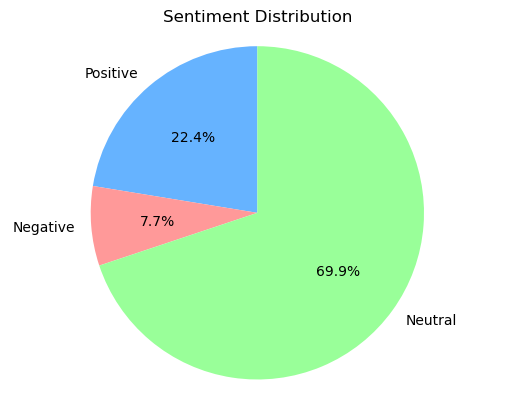

In [7]:
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

colors = ['#66b3ff', '#ff9999', '#99ff99']  

plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

#### Word Cloud

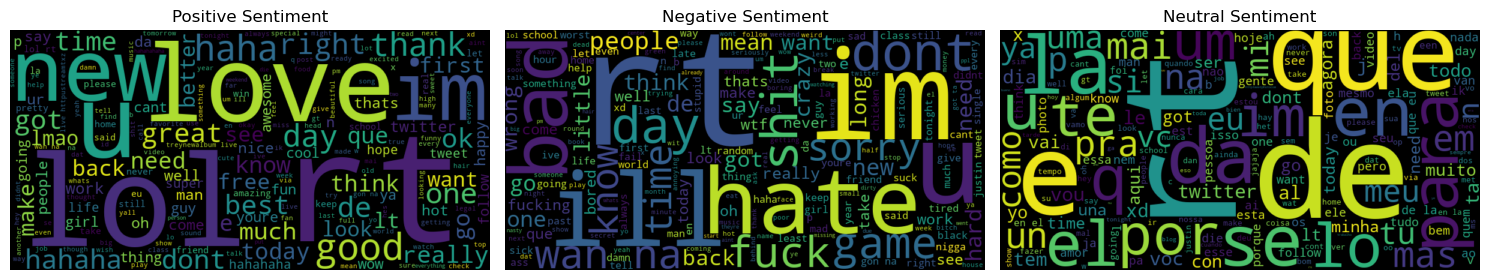

In [11]:
positive_texts = [text for text, sentiment in zip(processed_texts, sentiments) if sentiment > 0]
negative_texts = [text for text, sentiment in zip(processed_texts, sentiments) if sentiment < 0]
neutral_texts = [text for text, sentiment in zip(processed_texts, sentiments) if sentiment == 0]

positive_combined_text = ' '.join(positive_texts)
negative_combined_text = ' '.join(negative_texts)
neutral_combined_text = ' '.join(neutral_texts)

positive_wordcloud = WordCloud(width=800, height=400).generate(positive_combined_text)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_combined_text)
neutral_wordcloud = WordCloud(width=800, height=400).generate(neutral_combined_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].set_title('Positive Sentiment')
axes[0].axis('off')

axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].set_title('Negative Sentiment')
axes[1].axis('off')

axes[2].imshow(neutral_wordcloud, interpolation='bilinear')
axes[2].set_title('Neutral Sentiment')
axes[2].axis('off')

plt.tight_layout()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_36684\219147833.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(top_positive_words, rotation=45)
C:\Users\ACER\AppData\Local\Temp\ipykernel_36684\219147833.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(top_negative_words, rotation=45)
C:\Users\ACER\AppData\Local\Temp\ipykernel_36684\219147833.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(top_neutral_words, rotation=45)


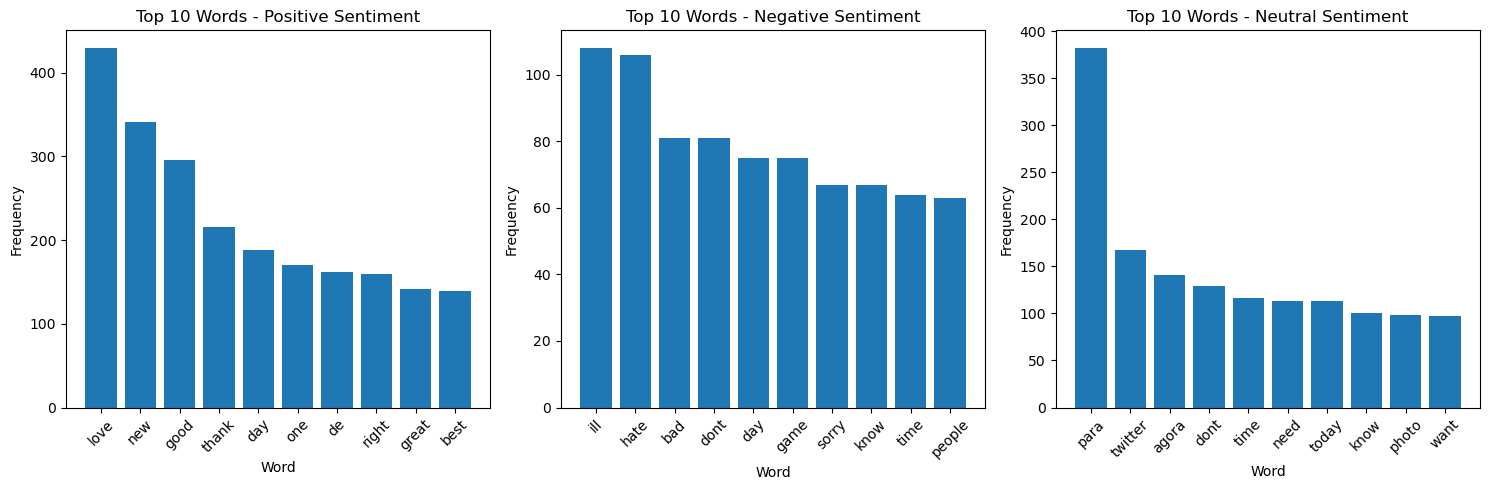

In [22]:
positive_word_freq = positive_wordcloud.process_text(positive_combined_text)
negative_word_freq = negative_wordcloud.process_text(negative_combined_text)
neutral_word_freq = neutral_wordcloud.process_text(neutral_combined_text)

english_words = set(words.words())

def filter_valid_words(word_freq, min_length=1):
    valid_word_freq = {}
    for word, freq in word_freq.items():
        if word in english_words and len(word) > min_length:
            valid_word_freq[word] = freq
    return valid_word_freq

positive_valid_word_freq = filter_valid_words(positive_word_freq)
negative_valid_word_freq = filter_valid_words(negative_word_freq)
neutral_valid_word_freq = filter_valid_words(neutral_word_freq, min_length=3)

positive_sorted_word_freq = dict(sorted(positive_valid_word_freq.items(), key=lambda x: x[1], reverse=True))
negative_sorted_word_freq = dict(sorted(negative_valid_word_freq.items(), key=lambda x: x[1], reverse=True))
neutral_sorted_word_freq = dict(sorted(neutral_valid_word_freq.items(), key=lambda x: x[1], reverse=True))

top_positive_words = list(positive_sorted_word_freq.keys())[:10]
top_positive_freq = list(positive_sorted_word_freq.values())[:10]

top_negative_words = list(negative_sorted_word_freq.keys())[:10]
top_negative_freq = list(negative_sorted_word_freq.values())[:10]

top_neutral_words = list(neutral_sorted_word_freq.keys())[:10]
top_neutral_freq = list(neutral_sorted_word_freq.values())[:10]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Positive Sentiment
axes[0].bar(top_positive_words, top_positive_freq)
axes[0].set_title('Top 10 Words - Positive Sentiment')
axes[0].set_xlabel('Word')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(top_positive_words, rotation=45)

# Negative Sentiment
axes[1].bar(top_negative_words, top_negative_freq)
axes[1].set_title('Top 10 Words - Negative Sentiment')
axes[1].set_xlabel('Word')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(top_negative_words, rotation=45)

# Neutral Sentiment
axes[2].bar(top_neutral_words, top_neutral_freq)
axes[2].set_title('Top 10 Words - Neutral Sentiment')
axes[2].set_xlabel('Word')
axes[2].set_ylabel('Frequency')
axes[2].set_xticklabels(top_neutral_words, rotation=45)

plt.tight_layout()
plt.show()